### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



# Iniciemos la exploracion de los datos

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [234]:
df = pd.read_excel('/content/DataTrain.xlsx')
DRAFT = pd.read_excel('/content/Data_trainVyg.xlsx')

In [235]:
df

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


In [236]:
DRAFT

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
...,...,...,...
106,106,2019042101,7.425
107,107,2019042309,9.335
108,108,2019050700,9.240
109,109,2019052101,7.435


Interesa como rellenar el espacio vacio para el DRAFT entre dias cuando no se registra.

1) primeramente eliminar las filas de fechas que no haya en el dataframe principal

2) agregar las fechas intermedias faltantes a v y rellenar con el promedio entre las fechas que si se tienen.

Para el dataset principal debemos buscar NaN o empty y rellenar con el promedio, aqui si es representativo dado la abundacia de fechas.
Luego calcular la dif de flux


In [237]:
# Inicialmente verificar que no hay NaN en los dataframes
df.isna().any().any(), DRAFT.isna().any().any()

(False, False)

# Ahora demos formato a las fechas en DRAFT

In [238]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [239]:
DRAFT = pd.read_excel('/content/Data_trainVyg.xlsx')
DRAFT['Date(UTC)'] = pd.to_datetime(DRAFT['Date(UTC)'], format='%Y%m%d%H')
DRAFT['Date(UTC)'] = DRAFT['Date(UTC)'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [240]:
DRAFT.columns = ['vyg', 'Date', 'DRAFT']

In [241]:
DRAFT

,vyg,Date,DRAFT
0,0,2016-06-03 01:00:00,9.175
1,1,2016-06-25 00:00:00,9.250
2,2,2016-06-27 00:00:00,9.365
3,3,2016-06-29 01:00:00,8.645
4,4,2016-07-06 00:00:00,7.805
...,...,...,...
106,106,2019-04-21 01:00:00,7.425
107,107,2019-04-23 09:00:00,9.335
108,108,2019-05-07 00:00:00,9.240
109,109,2019-05-21 01:00:00,7.435


# Ahora merge los dataset y llenar los NaN

In [242]:
A = pd.merge(df, DRAFT, on='Date', how='left')
A.drop('vyg', axis=1)
orden = ['Date','Latitude_degree','Longitude_degree','Beaufort','Speed(Ground)','M/E REVOLUTION','DRAFT','M/E F O FLOW COUNTER']
A = A[orden]

In [243]:
A

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,9.175,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,NaN,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,NaN,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,NaN,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,NaN,2531934
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,NaN,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,NaN,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,NaN,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,NaN,5165079


In [244]:
A.isna().sum()

Date                        0
Latitude_degree             0
Longitude_degree            0
Beaufort                    0
Speed(Ground)               0
M/E REVOLUTION              0
DRAFT                   19909
M/E F O FLOW COUNTER        0
dtype: int64

Los llenamos con el valor anterior suponiendo que los cambios solo se producen cuando hay descargue en un puerto

In [245]:
A.fillna(method='ffill', inplace=True)
A

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,9.175,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,9.175,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,9.175,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,9.175,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,9.175,2531934
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,7.610,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,7.610,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,7.610,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,7.610,5165079


Ahora cambiamos valores string por numericos

In [246]:
A['Beaufort'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [247]:
mapp = {'low': 0, 'medium': 1, 'high':2 }
A['Beaufort'] = A['Beaufort'].replace(mapp)

In [248]:
A

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,1,17.5,86,9.175,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,1,18.3,86,9.175,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,1,18.4,86,9.175,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,1,18.1,86,9.175,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,1,18.8,86,9.175,2531934
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,0,0.0,0,7.610,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,0,0.0,0,7.610,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,0,0.0,0,7.610,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,0,0.0,0,7.610,5165079


Ahora construyamos diff

In [249]:
A['Diff'] = A['M/E F O FLOW COUNTER'].diff()
A

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,M/E F O FLOW COUNTER,Diff
0,2016-06-03 01:00:00,35.175000,141.595556,1,17.5,86,9.175,2531274,NaN
1,2016-06-03 02:00:00,35.315833,141.884444,1,18.3,86,9.175,2531443,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,1,18.4,86,9.175,2531608,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,1,18.1,86,9.175,2531771,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,1,18.8,86,9.175,2531934,163.0
...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,0,0.0,0,7.610,5165079,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,0,0.0,0,7.610,5165079,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,0,0.0,0,7.610,5165079,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,0,0.0,0,7.610,5165079,0.0


In [250]:
B = A.copy()
B = B.drop('M/E F O FLOW COUNTER', axis=1)
B = B.fillna(0)
B.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,131.690250
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,598.314204
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,77429.000000


Hay un problema en el diff con ese maximo de 77k

In [251]:
B['Diff'].max()

77429.0

In [252]:
B

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,2016-06-03 01:00:00,35.175000,141.595556,1,17.5,86,9.175,0.0
1,2016-06-03 02:00:00,35.315833,141.884444,1,18.3,86,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,1,18.4,86,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,1,18.1,86,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,1,18.8,86,9.175,163.0
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,0,0.0,0,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,0,0.0,0,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,0,0.0,0,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,0,0.0,0,7.610,0.0


# Ahora estudiemos los outliers

<Axes: >

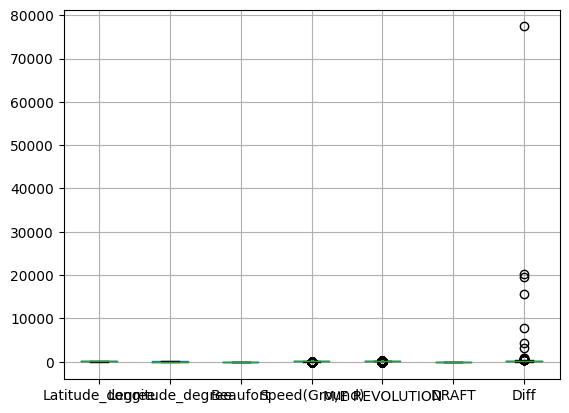

In [253]:
B.boxplot()

Ahora preocupemonos por identificar puntos por fuera de los cuartiles y cambiarlos por la media de cada columna

In [254]:
def remove_outliers(column):
    mean_value = column.mean()
    std_value = column.std()
    lower_bound = mean_value - 2.698 * std_value
    upper_bound = mean_value + 2.698 * std_value
    column[(column < lower_bound) | (column > upper_bound)] = mean_value
    return column

In [255]:
B.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,131.690250
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,598.314204
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,77429.000000


In [256]:
C = B.drop('Date',axis=1).copy()
C = C.apply(remove_outliers, axis=0)
C.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,124.343442
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,64.105849
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,827.000000


Dado que se remueven los outliers mas salvajes entonces cambian la media y desviacion estandar, por esta razón, el boxplot a continuacion sigue mostrando outliers, son outliers de esta iteracion

<Axes: >

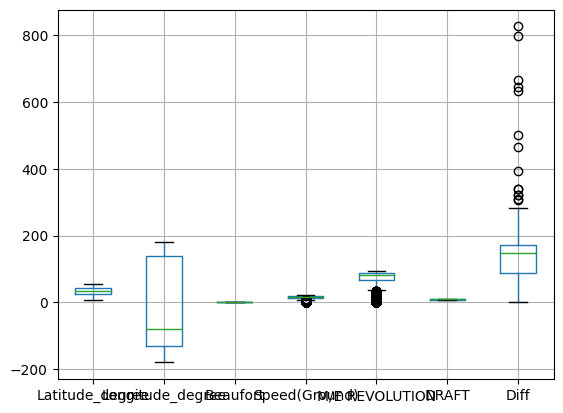

In [257]:
C.boxplot()

Si aplicamos de nuevo obtenemos?

<Axes: >

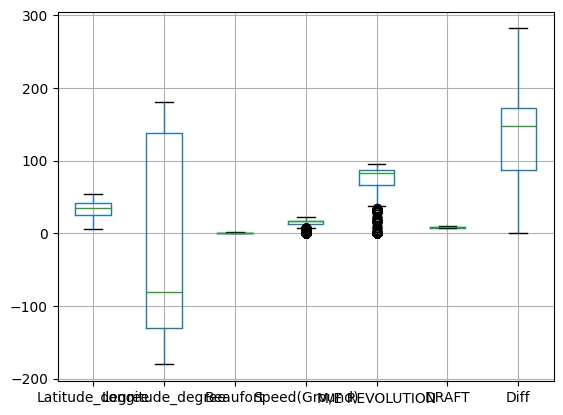

In [258]:
C1 = C.copy()
C1.apply(remove_outliers, axis=0).copy()
C1.boxplot()

In [259]:
B.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,131.690250
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,598.314204
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,77429.000000


In [260]:
C.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,124.343442
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,64.105849
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,827.000000


In [261]:
C1.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.60005,14.024100,69.619350,8.695166,124.087332
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,63.186873
min,6.571944,-180.195278,0.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,1.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,2.00000,22.100000,95.000000,9.495000,282.000000


Me tomaré el atrevimiento, dado que los cambios en desviación estándar y media son casi imperceptibles, de hacer el filtro 2 veces y seguir con el dataframe último que tiene un boxplot muy lindo :)

In [262]:
D = C1.copy()
D

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,35.175000,141.595556,1,17.5,86,9.175,0.0
1,35.315833,141.884444,1,18.3,86,9.175,169.0
2,35.458333,142.121111,1,18.4,86,9.175,165.0
3,35.573611,142.548611,1,18.1,86,9.175,163.0
4,35.939722,142.768889,1,18.8,86,9.175,163.0
...,...,...,...,...,...,...,...
19995,34.751111,137.318333,0,0.0,0,7.610,0.0
19996,34.750556,137.317778,0,0.0,0,7.610,0.0
19997,34.750833,137.317500,0,0.0,0,7.610,0.0
19998,34.751111,137.317500,0,0.0,0,7.610,0.0


In [263]:
F = D.copy()
F.insert(0, 'Date', B['Date'])
F

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,2016-06-03 01:00:00,35.175000,141.595556,1,17.5,86,9.175,0.0
1,2016-06-03 02:00:00,35.315833,141.884444,1,18.3,86,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,1,18.4,86,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,1,18.1,86,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,1,18.8,86,9.175,163.0
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,0,0.0,0,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,0,0.0,0,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,0,0.0,0,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,0,0.0,0,7.610,0.0


Tenemos D sin las fechas y F con las fechas


# Estudiemos las relaciones a priori de los datos


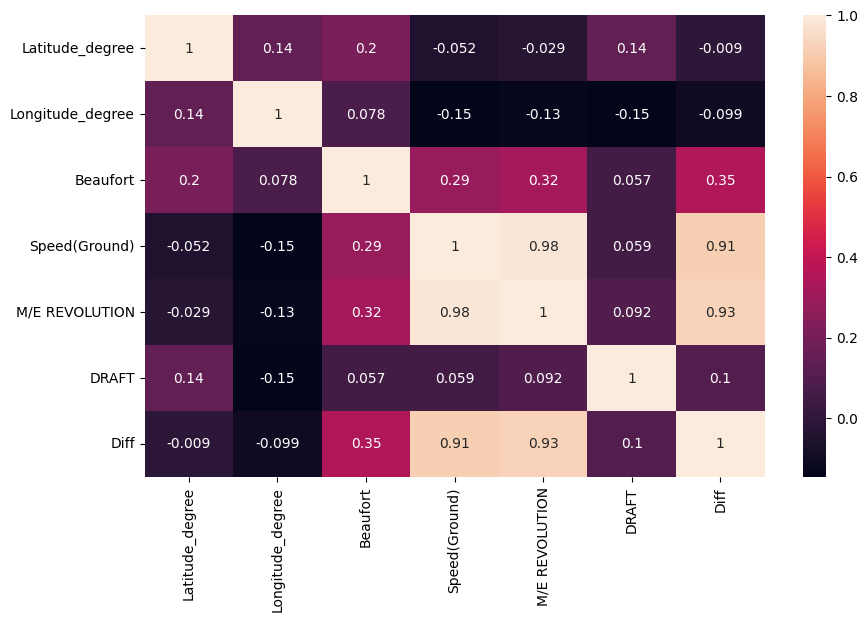

In [264]:
corrD = D.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corrD, annot = True)
plt.show()

De inmediato parece ser que la longitud tiene un efecto mucho más apreciable comparado a la latitud. Un poco extraño considerando las contribuciones a la navegabilidad generalmente tienen que ver con clima y este cambia de manera considerable con la latitud!

Podemos además apreciar que los factores más influenciales en el consumo de combustible son la velocidad, las revoluciones y el viento. Que si bien puede soplar en cualquier dirección, solamente las más orientadas al rumbo del barco no le hacen desviar, porduciendo un efecto neto por las brisas

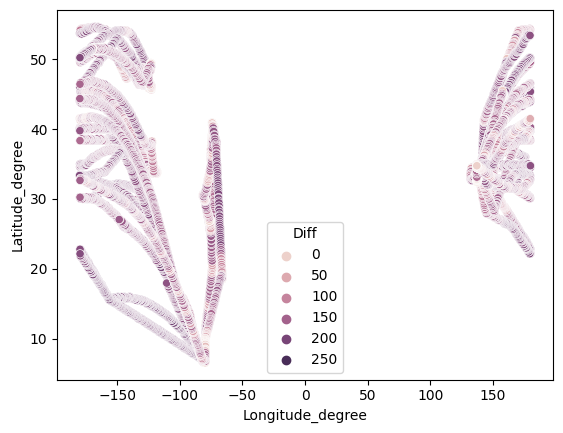

In [265]:
ax = sns.scatterplot(x='Longitude_degree', y = 'Latitude_degree', hue='Diff', data=D, markers='.')


Me veo inclinado a eliminar del dataset la medida de latitud! Por el momento seguiré así

# Separemos Beaufort en 3 columnas

In [266]:
L = pd.get_dummies(D['Beaufort'], prefix='Wind')
orden = ['Wind_Low','Wind_Medium','Wind_High']
L.columns = orden
L

,Wind_Low,Wind_Medium,Wind_High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
19995,1,0,0
19996,1,0,0
19997,1,0,0
19998,1,0,0


In [267]:
E = D.copy()
E = E.drop('Beaufort', axis =1)
E.insert(2, 'Wind_Low', L['Wind_Low'])
E.insert(3, 'Wind_Medium', L['Wind_Medium'])
E.insert(4, 'Wind_High', L['Wind_High'])
ENTRY = E.copy()
ENTRY

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,35.175000,141.595556,0,1,0,17.5,86,9.175,0.0
1,35.315833,141.884444,0,1,0,18.3,86,9.175,169.0
2,35.458333,142.121111,0,1,0,18.4,86,9.175,165.0
3,35.573611,142.548611,0,1,0,18.1,86,9.175,163.0
4,35.939722,142.768889,0,1,0,18.8,86,9.175,163.0
...,...,...,...,...,...,...,...,...,...
19995,34.751111,137.318333,1,0,0,0.0,0,7.610,0.0
19996,34.750556,137.317778,1,0,0,0.0,0,7.610,0.0
19997,34.750833,137.317500,1,0,0,0.0,0,7.610,0.0
19998,34.751111,137.317500,1,0,0,0.0,0,7.610,0.0


In [268]:
ENTRY.describe()

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.430950,0.538050,0.031000,14.024100,69.619350,8.695166,124.087332
std,12.263632,129.761046,0.495222,0.498563,0.173322,5.924093,29.264823,0.734726,63.186873
min,6.571944,-180.195278,0.000000,0.000000,0.000000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.000000,0.000000,0.000000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,0.000000,1.000000,0.000000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.000000,1.000000,0.000000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,1.000000,1.000000,1.000000,22.100000,95.000000,9.495000,282.000000


Tenemos el dataframe de datos de entrada llamado ENTRY

# Split de datos


Ahora debemos hacer un split stratificado de los datos para tener un set de entrenamiento representativo

In [269]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [270]:
ENTRY1 = ENTRY.copy()

In [271]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [272]:
#for train_index, test_index in sss.split(ENTRY1, ENTRY1["Diff"]):
 #strat_train_set = ENTRY1.loc[train_index]
 #[strat_test_set = ENTRY1.loc[test_index]

Dada la variabilidad del valor de Diff resulta que no hay suficientes instancias de un solo valor para hacer la estratificacion. Sin embargo, dada la gran cantidad de datos, no me preocupa mucho que llegue a ocurrir un sampling bias.

In [273]:
X_train, X_test, y_train, y_test = train_test_split(ENTRY1, ENTRY1['Diff'], test_size=0.2, random_state=42)
X_train = X_train.drop('Diff', axis=1)
X_test = X_test.drop('Diff', axis=1)
X_train
T = X_train.drop(['Latitude_degree', 'Longitude_degree'], axis=1)

# AHORA PREPAREMOS CON EL MISMO FORMATO LOS DATOS DE PREDICT

In [274]:
G = pd.read_excel('/content/DataTest.xlsx')
G

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


In [275]:
G.isna().any().any()

False

In [276]:
G['Date'] = G['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [277]:
H = pd.merge(G, DRAFT, on='Date', how='left')
H.drop('vyg', axis=1)
orden = ['Date','Latitude_degree','Longitude_degree','Beaufort','Speed(Ground)','M/E REVOLUTION','DRAFT']
H = H[orden]
H

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,NaN
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,NaN
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,NaN
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,NaN
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,NaN
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,NaN
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,NaN
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,NaN
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,NaN


In [278]:
H['DRAFT'][0] = 7.610
H

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,7.61
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,NaN
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,NaN
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,NaN
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,NaN
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,NaN
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,NaN
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,NaN
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,NaN


In [279]:
H.fillna(method='ffill', inplace=True)
H

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,7.61
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,7.61
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,7.61
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,7.61
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,7.61
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,9.35
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,9.35
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,9.35
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,9.35


In [280]:
I = H.copy()
I = I.drop('Date', axis=1)
I = I.drop('Beaufort', axis =1)

In [281]:
I.describe()

,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,DRAFT
count,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,31.162111,-13.430771,13.665500,67.622488,8.643097
std,8.559746,140.727562,6.068101,31.735437,0.795584
min,6.921111,-180.132500,0.000000,0.000000,7.340000
25%,30.001944,-138.894167,12.600000,65.000000,8.145000
50%,32.811944,-81.551944,16.500000,84.000000,9.220000
75%,34.841111,139.728889,17.600000,87.000000,9.335000
max,50.258611,180.041667,20.800000,95.000000,9.460000


In [282]:
I1 = I.copy()
I1 = I1.apply(remove_outliers, axis=0)
I1.describe()

,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,DRAFT
count,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,31.477633,-13.430771,13.665500,67.622488,8.643097
std,8.105139,140.727562,6.068101,31.735437,0.795584
min,8.103056,-180.132500,0.000000,0.000000,7.340000
25%,30.051389,-138.894167,12.600000,65.000000,8.145000
50%,32.811944,-81.551944,16.500000,84.000000,9.220000
75%,34.841111,139.728889,17.600000,87.000000,9.335000
max,50.258611,180.041667,20.800000,95.000000,9.460000


No hay outliers en el data a predecir

In [283]:
J = pd.get_dummies(H['Beaufort'], prefix='Wind')
orden = ['Wind_High','Wind_Low','Wind_Medium']
J.columns = orden
J

,Wind_High,Wind_Low,Wind_Medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4424,0,0,1
4425,0,0,1
4426,0,0,1
4427,0,0,1


In [284]:
K = I1.copy()
K.insert(2, 'Wind_Low', J['Wind_Low'])
K.insert(3, 'Wind_Medium', J['Wind_Medium'])
K.insert(4, 'Wind_High', J['Wind_High'])
K

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT
0,34.750556,137.318056,1,0,0,0.0,0,7.61
1,34.751111,137.317222,1,0,0,0.0,0,7.61
2,34.750556,137.317500,1,0,0,0.0,0,7.61
3,34.751389,137.317500,1,0,0,0.0,0,7.61
4,34.750833,137.317500,1,0,0,0.0,0,7.61
...,...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,0,1,0,17.9,92,9.35
4425,33.053056,-131.792500,0,1,0,17.8,91,9.35
4426,33.093333,-131.602500,0,1,0,17.5,91,9.35
4427,32.785000,-131.243333,0,1,0,17.5,92,9.35


Tenemos un dataframe con los datos que vamos a predecir

In [285]:
PREDICT = K.copy()
PREDICT

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT
0,34.750556,137.318056,1,0,0,0.0,0,7.61
1,34.751111,137.317222,1,0,0,0.0,0,7.61
2,34.750556,137.317500,1,0,0,0.0,0,7.61
3,34.751389,137.317500,1,0,0,0.0,0,7.61
4,34.750833,137.317500,1,0,0,0.0,0,7.61
...,...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,0,1,0,17.9,92,9.35
4425,33.053056,-131.792500,0,1,0,17.8,91,9.35
4426,33.093333,-131.602500,0,1,0,17.5,91,9.35
4427,32.785000,-131.243333,0,1,0,17.5,92,9.35


# Ahora hagamos la regresión multilinear

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [287]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [288]:
model.score(X_test, y_test)

0.8653715682247154

El score da a entender que es un bueno modelo, pero falta un poco mas de precision

Las relaciones no parecen lineales, probemos con RandomForest Regression

# Probemos RandomForest Regression

In [289]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Print the predicted values
print(y_pred)
M =pd.DataFrame(y_test - y_pred)
N = (M['Diff']<8).sum()/len(y_test)
N

[167.19 110.43  74.78 ... 178.05  60.94  75.76]


0.90825

In [290]:
model.score(X_train, y_train)
model.score(X_test, y_test)

0.9617836196521093

In [291]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.994579453595488

In [292]:
model.score(X_test, y_test)

0.9623034206198949

La mejora en prediccion de datos es minuscula, claro que igual no hay overfitting

In [293]:
y_pred = model.predict(X_test)
# Print the predicted values
print(y_pred)
M =pd.DataFrame(y_test - y_pred)
N = (M['Diff']<7.27).sum()/len(y_test)*100
m = ENTRY1['Diff'].mean()
print('Bajo una tolerancia de 7.27 unidades de combustible, el modelo es capaz de predecir el {}% de los datos. \nConsiderando que un valor caracterisitco del dataset es una media de {} para el valor de consumo de combustible. \nEs un error de 6% frente a la media.'.format(N,m))

[167.165 112.215  74.28  ... 178.135  61.325  74.19 ]
Bajo una tolerancia de 7.27 unidades de combustible, el modelo es capaz de predecir el 90.0% de los datos. 
Considerando que un valor caracterisitco del dataset es una media de 124.08733199661125 para el valor de consumo de combustible. 
Es un error de 6% frente a la media.


# Conclusion (ERRONEAS)

Dados los resultados en la parte inmediatamente anterior, me siento relativamente cómodo reportando las predicciones para los datos.

In [294]:
y_predict = model.predict(PREDICT)
y_predict = pd.DataFrame(y_predict)
y_predict

,0
0,0.200000
1,1.329500
2,0.455000
3,0.076833
4,0.066250
...,...
4424,193.430000
4425,185.080000
4426,168.621717
4427,182.830000


In [295]:
FINALPREDICTION = PREDICT.copy()
FINALPREDICTION['Diff'] = y_predict

In [296]:
FINALPREDICTION.describe()

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,31.477633,-13.430771,0.362610,0.616844,0.020546,13.665500,67.622488,8.643097,120.130689
std,8.105139,140.727562,0.480808,0.486211,0.141876,6.068101,31.735437,0.795584,62.776079
min,8.103056,-180.132500,0.000000,0.000000,0.000000,0.000000,0.000000,7.340000,0.000000
25%,30.051389,-138.894167,0.000000,0.000000,0.000000,12.600000,65.000000,8.145000,81.985000
50%,32.811944,-81.551944,0.000000,1.000000,0.000000,16.500000,84.000000,9.220000,150.120000
75%,34.841111,139.728889,1.000000,1.000000,0.000000,17.600000,87.000000,9.335000,167.898434
max,50.258611,180.041667,1.000000,1.000000,1.000000,20.800000,95.000000,9.460000,200.840000


In [297]:
ENTRY.describe()

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,0.430950,0.538050,0.031000,14.024100,69.619350,8.695166,124.087332
std,12.263632,129.761046,0.495222,0.498563,0.173322,5.924093,29.264823,0.734726,63.186873
min,6.571944,-180.195278,0.000000,0.000000,0.000000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,0.000000,0.000000,0.000000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,0.000000,1.000000,0.000000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,1.000000,1.000000,0.000000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,1.000000,1.000000,1.000000,22.100000,95.000000,9.495000,282.000000


In [298]:
FINALPREDICTION

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,34.750556,137.318056,1,0,0,0.0,0,7.61,0.200000
1,34.751111,137.317222,1,0,0,0.0,0,7.61,1.329500
2,34.750556,137.317500,1,0,0,0.0,0,7.61,0.455000
3,34.751389,137.317500,1,0,0,0.0,0,7.61,0.076833
4,34.750833,137.317500,1,0,0,0.0,0,7.61,0.066250
...,...,...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,0,1,0,17.9,92,9.35,193.430000
4425,33.053056,-131.792500,0,1,0,17.8,91,9.35,185.080000
4426,33.093333,-131.602500,0,1,0,17.5,91,9.35,168.621717
4427,32.785000,-131.243333,0,1,0,17.5,92,9.35,182.830000


Sin considerar outliers, podemos ver que los valores de Diff para la prediccion tienen metricas estadísticas en extremo similar con la información proporcionada para entrenar el modelo. Con estos últimos resultados y las consideraciones de la sección RANDOMFOREST REGRESSION me siento suficientemente cómodo con los resultados obtenidos.

En otros notebook corrí el mismo código pero sin hacer filtros de outlier. Para cada uno de los modelos tenemos predicciones. Para la misma tolerancia de 7.27und:

1) El modelo con 2 filtros de outliers, el actual, 90%

2) El modelo con 1 filtro de outliers, 90%

3) El modelo sin filtro de outliers, 90.45%

Parece ser que el proceso de outliers con las boxplot tiene poco efecto en el resutlado de las predicciones. Sin embargo, presento el modelo con el filtrado para evidenciar el proceso.

Importante mencionar que los valores estadísticos característicos de las muestras si se ven con mayores diferencias cuando no se hace filtrado.

# Conclusiones finales

Si bien el analisis que hice en la celda anterior me parece acertado, tambien es cierto que soy sopenco y evalué mal la efectividad del modelo.

1) En otros Notebook se corrio el codigo sin aplicar los filtros para outliers:

El que no tiene filtro alguno obtuvo una prediccion de 0.1

El que tiene un primer filto obtiene una predicción de 0.92

Se concluye que tratar el dataset con filtro para outliers mejora la predicción del modelo.

3) Eliminar los vientos, empeora

4) Eliminar Draft, empeora

5) Eliminar caracteristicas poco relevantes de la matriz de correlacion no afecta la prediccion, particularmente Longitud, Latitud

In [299]:
y_final = model.predict(PREDICT)
y_final = pd.DataFrame(y_final)

In [300]:
FINAL =PREDICT.copy()
FINAL['Diff']=y_final
FINAL

,Latitude_degree,Longitude_degree,Wind_Low,Wind_Medium,Wind_High,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
0,34.750556,137.318056,1,0,0,0.0,0,7.61,0.200000
1,34.751111,137.317222,1,0,0,0.0,0,7.61,1.329500
2,34.750556,137.317500,1,0,0,0.0,0,7.61,0.455000
3,34.751389,137.317500,1,0,0,0.0,0,7.61,0.076833
4,34.750833,137.317500,1,0,0,0.0,0,7.61,0.066250
...,...,...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,0,1,0,17.9,92,9.35,193.430000
4425,33.053056,-131.792500,0,1,0,17.8,91,9.35,185.080000
4426,33.093333,-131.602500,0,1,0,17.5,91,9.35,168.621717
4427,32.785000,-131.243333,0,1,0,17.5,92,9.35,182.830000


Esta es la prediccion para la fechas siguientes a las que tenemos datos